In [ ]:
from data import generate_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

n = 1000

x, y, y_noisy1 = generate_dataset(n=n, noise_std=0.5, random_state=1)
_, _, y_noisy2 = generate_dataset(n=n, noise_std=1.0, random_state=1)
_, _, y_noisy3 = generate_dataset(n=n, noise_std=2.0, random_state=1)
_, _, y = generate_dataset(n=n, noise_std=0, random_state=1)


In [3]:

def design_matrix(x, degree):
    return np.vstack([x**i for i in range(degree+1)]).T

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)





x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)


_, _, y1_train, y1_test = train_test_split(x, y_noisy1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y_noisy2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(x, y_noisy3, test_size=0.2, random_state=42)
_, _, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler.transform(x_test.reshape(-1, 1)).flatten()

x_train_scaled = np.clip(x_train_scaled, -1, 1)
x_test_scaled  = np.clip(x_test_scaled, -1, 1)


In [4]:



def ols_fit(X, y):
    return np.linalg.pinv(X) @ y

def ridge_fit(X, y, lam):
    n, p = X.shape
    I = np.eye(p)
    return np.linalg.pinv(X.T @ X + lam * I) @ (X.T @ y)

def gd_LASSO(X_train, y_train, X_test, y_test, eta=0.1, num_iters=100, lam=0.1):
    n, d = X_train.shape
    theta = np.zeros(d)
    mse_train, mse_test = [], []
    for _ in range(num_iters):
        grad = (2.0/n) * (X_train.T @ (X_train @ theta - y_train))
        subgrad = lam * np.sign(theta)
        total_grad = grad + subgrad
        theta -= eta * total_grad
        mse_train.append(np.mean((y_train - X_train @ theta)**2))
        mse_test.append(np.mean((y_test - X_test @ theta)**2))
    return theta, mse_train, mse_test




In [5]:

def k_fold_cv_regression(X, y, model, k=5):
    
    n = len(y)
    indices = np.arange(n)
    np.random.shuffle(indices)

    fold_size = n // k
    mse_scores = []

    for i in range(k):
    
        test_idx = indices[i * fold_size : (i + 1) * fold_size]
        train_idx = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = np.mean((y_test - y_pred)**2)
        mse_scores.append(mse)

    return np.mean(mse_scores)


c:\hermanis\miniconda3\envs\geo\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_33620\1481614765.py:5: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_hat)**2)
c:\hermanis\miniconda3\envs\geo\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_33620\1481614765.py:5: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_hat)**2)
c:\hermanis\miniconda3\envs\geo\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_33620\1481614765.py:5: RuntimeWarning: overflow encounte

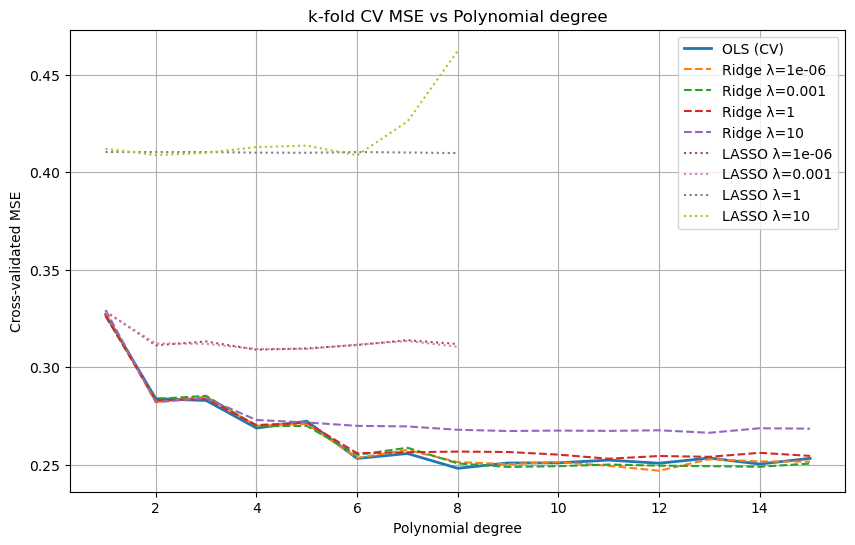

Best OLS degree: 8 (CV MSE=0.2483)


In [12]:



def design_matrix(x, degree):
    return np.vstack([x**i for i in range(degree + 1)]).T

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def ols_fit(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def ridge_fit(X, y, lam):
    n, p = X.shape
    I = np.eye(p)
    return np.linalg.pinv(X.T @ X + lam * I) @ X.T @ y


def gd_LASSO(X_train, y_train, X_test, y_test, eta=0.05, num_iters=500, lam=0.1):
    n, d = X_train.shape
    theta = np.zeros(d)
    mse_train, mse_test = [], []

    for _ in range(num_iters):
        grad = (2.0/n) * (X_train.T @ (X_train @ theta - y_train))
        subgrad = lam * np.sign(theta)
        theta -= eta * (grad + subgrad)

        mse_train.append(mse(y_train, X_train @ theta))
        mse_test.append(mse(y_test, X_test @ theta))

    return theta, mse_train, mse_test


def k_fold_cv(x, y, degree, k=5, model="ols", lam=0.1, eta=0.05, num_iters=500):
    n = len(y)
    indices = np.arange(n)
    np.random.shuffle(indices)
    fold_size = n // k
    mse_scores = []

    for i in range(k):
        test_idx = indices[i * fold_size:(i + 1) * fold_size]
        train_idx = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

  
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
        x_test_scaled = scaler.transform(x_test.reshape(-1, 1)).flatten()

    
        X_train = design_matrix(x_train_scaled, degree)
        X_test = design_matrix(x_test_scaled, degree)

      
        if model == "ols":
            theta = ols_fit(X_train, y_train)
        elif model == "ridge":
            theta = ridge_fit(X_train, y_train, lam)
        elif model == "lasso":
            theta, _, _ = gd_LASSO(X_train, y_train, X_test, y_test, lam=lam, eta=eta, num_iters=num_iters)
        else:
            raise ValueError("Ukjent modell")

        y_pred = X_test @ theta
        mse_scores.append(mse(y_test, y_pred))

    return np.mean(mse_scores)



degrees = range(1, 16)
ridge_lambdas = [1e-6, 1e-3, 1, 10]
lasso_lambdas = [1e-6, 1e-3, 1, 10]

ols_cv_mse = []
ridge_cv_mse = {lam: [] for lam in ridge_lambdas}
lasso_cv_mse = {lam: [] for lam in lasso_lambdas}

for d in degrees:
    ols_cv_mse.append(k_fold_cv(x_train, y1_train, degree=d, k=5, model="ols"))

    for lam in ridge_cv_mse.keys():
        ridge_cv_mse[lam].append(k_fold_cv(x_train, y1_train, degree=d, k=5, model="ridge", lam=lam))

    for lam in lasso_cv_mse.keys():
        lasso_cv_mse[lam].append(k_fold_cv(x_train, y1_train, degree=d, k=5, model="lasso", lam=lam, eta=0.001, num_iters=1000))


plt.figure(figsize=(10,6))
plt.plot(degrees, ols_cv_mse, label="OLS (CV)", linewidth=2)

for lam, scores in ridge_cv_mse.items():
    plt.plot(degrees, scores, '--', label=f"Ridge λ={lam}")

for lam, scores in lasso_cv_mse.items():
    plt.plot(degrees, scores, ':', label=f"LASSO λ={lam}")

plt.xlabel("Polynomial degree")
plt.ylabel("Cross-validated MSE")
plt.title("k-fold CV MSE vs Polynomial degree")
plt.legend()
plt.grid(True)
plt.show()


ols_cv_mse = np.asarray(ols_cv_mse)
best_ols_deg = degrees[int(ols_cv_mse.argmin())]
print(f"Best OLS degree: {best_ols_deg} (CV MSE={ols_cv_mse.min():.4f})")
